In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

## PROBLEM 1

In [37]:
df1 = pd.read_csv("C:/Users/212548638/Desktop/GL/Project2_AS/SalaryData.csv")

In [38]:
df1.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [40]:
df1.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

In [41]:
df1["Education"].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [42]:
df1["Occupation"].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [43]:
df1.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [44]:
df1.duplicated().sum()

0

## Problem 1A

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.
 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

One way ANOVA For the Education:

H0_Edu : The mean salary is the same across all the three levels (High school graduate, Bachelor, and Doctorate).

Ha_Edu: The mean salary is different in at least one level. 

One way ANOVA For the Occupation:

H0_Occ : The mean salary is the same across all the four levels (Administrative and clerical, Sales, Professional or specialty, and Executive or managerial)

Ha_Occ : The mean salary is different in at least level. 

α = 0.05

2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [45]:
formula1 = "Salary ~ C(Education)"
model1 = ols(formula1, df1).fit()
aov_table1 = anova_lm(model1)
print(aov_table1)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Since the p value = 1.257709e-08 is less than the significance level (alpha = 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one level of education.

3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [46]:
formula2 = "Salary ~ C(Occupation)"
model2 = ols(formula2, df1).fit()
aov_table2 = anova_lm(model2)
print(aov_table2)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Since the p value = 0.458508 is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis) and conclude that there is no difference in the mean salaries across the 4 levels of occupation.

4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

To find out which class means are significantly different, the Tukey Honest Significant Difference test is performed.

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [48]:
tukey1 = pairwise_tukeyhsd(endog=df1["Salary"],
                          groups=df1["Education"],
                          alpha=0.05)

In [49]:
print(tukey1)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


For Category education the table above shows that since the p- values(p-adj in the table) are lesser than the significance level for all the three levels of education, this implies that the all classes  mean are significantly different.

In [50]:
tukey2 = pairwise_tukeyhsd(endog=df1["Salary"],
                          groups=df1["Occupation"],
                          alpha=0.05)

In [51]:
print(tukey2)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


For the category occupation, the Tukey Honest Significant Difference test has further confirmed that the mean salaries across all occupation classes are significantly same. The table above confirms the same, wherein we see that all p-values are greater than 0.05.

## Problem 1B

1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

When doing linear modeling or ANOVA it’s useful to examine whether or not the effect of one variable depends on the level of one or more variables. If it does then we have what is called an “interaction”.

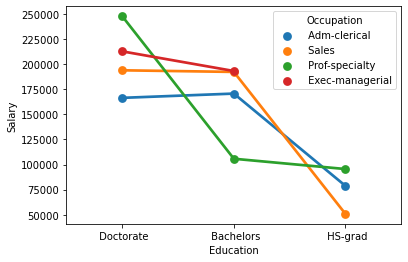

In [52]:
sns.pointplot(x="Education", y="Salary", data=df1, hue="Occupation",ci=None);

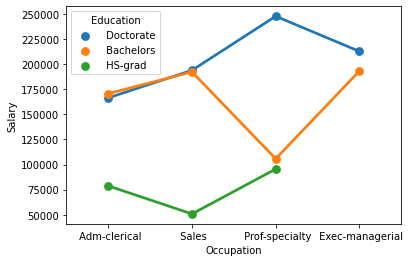

In [53]:
sns.pointplot(x="Occupation", y="Salary", data=df1, hue="Education",ci=None);

The interaction plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.

The following are some of the observations from the interaction plot:

People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.

•	People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries (salaries ranging from 170000–190000).

•	People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales.

•	Prof-Specialty people with education as Doctorate earn maximum salaries and people with education as HS-Grad earn the minimum.

•	Of all profession with HS-grad, Adm clerical people earn the lowest salaries 

•	People with education as Bachelors and occupation, Sales and Exec-Managerial earn almost the same salaries.

•	Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.

2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

𝐻0: The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’ (i. e. there is no interaction effect between the 2 independent variables, education and occupation).

𝐻1: There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.

In [54]:
formula3 = "Salary ~ C(Education)+ C(Occupation) + C(Education):C(Occupation)"
model3 = ols(formula3, df1).fit()
aov_table3 = anova_lm(model3)
print(aov_table3)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


As p value = 2.232500e-05 is lesser than the significance level (alpha = 0.05), we reject the null hypothesis.

Thus, we see that there is an interaction effect between education and occupation on the mean salary.

3.Explain the business implications of performing ANOVA for this particular case study.

From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the people. It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.

## Problem 2:

In [55]:
df = pd.read_csv('C:/Users/212548638/Desktop/GL/Project2_AS/Education+-+Post+12th+Standard.csv')

In [56]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [57]:
df.shape

(777, 18)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [59]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

Observations:
1) The data set has 777 observations and 18 variables in the data set.

2) Out of 18, only 1 column is object while rest are either integer or float.

3) There are no missing values in data set.

4) There are no duplicate rows present.

6) Total number of application received is 48094 for all universitities.

7) Number of applications accepted is 26330 for all universitities.

9) Maximum Graduation rate is 118% which looks like incorrect data.

10) Maximum Percentage of faculties with Ph.D.’s is 103 which looks like incorrect data.


2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### EDA

Let us define a function **'univariateAnalysis_numeric'** to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [62]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


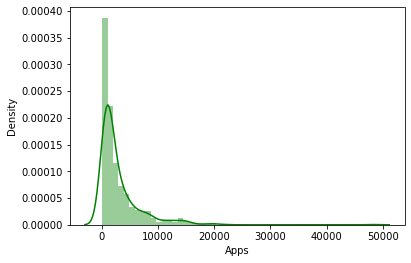

BoxPlot of Apps
----------------------------------------------------------------------------


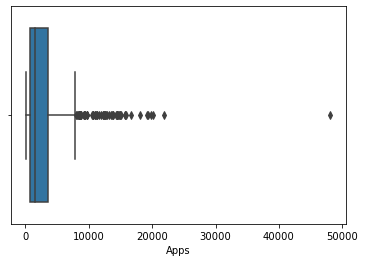

In [63]:
univariateAnalysis_numeric('Apps',20)

In [64]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

In [65]:
df_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


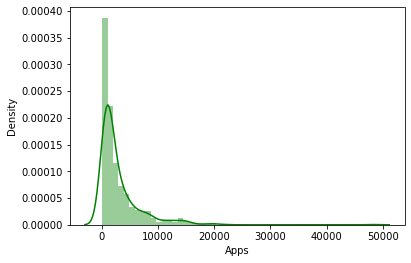

BoxPlot of Apps
----------------------------------------------------------------------------


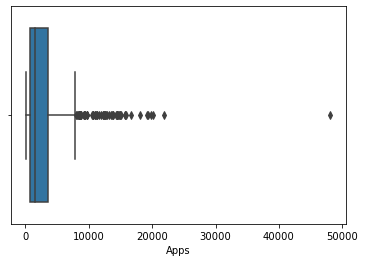

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


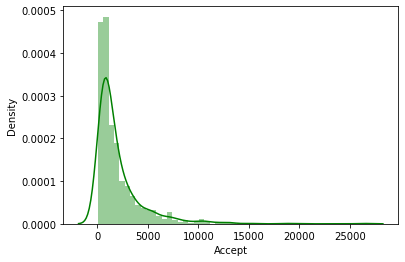

BoxPlot of Accept
----------------------------------------------------------------------------


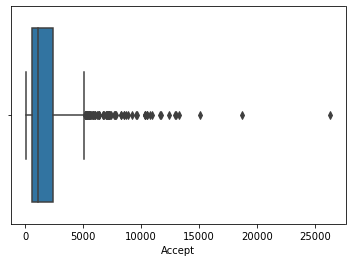

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


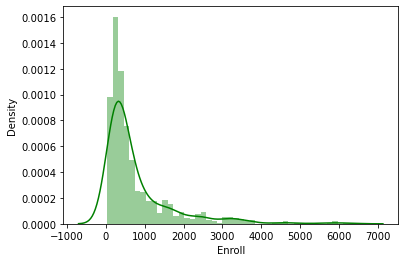

BoxPlot of Enroll
----------------------------------------------------------------------------


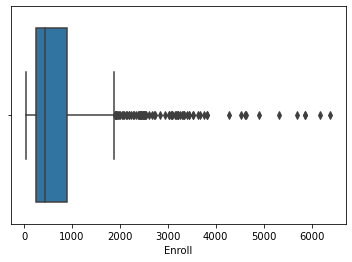

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


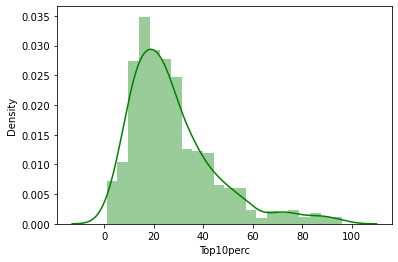

BoxPlot of Top10perc
----------------------------------------------------------------------------


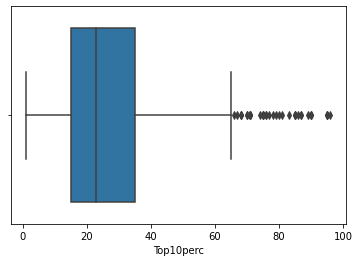

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


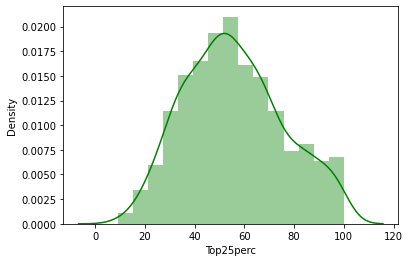

BoxPlot of Top25perc
----------------------------------------------------------------------------


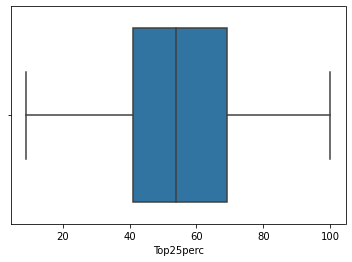

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


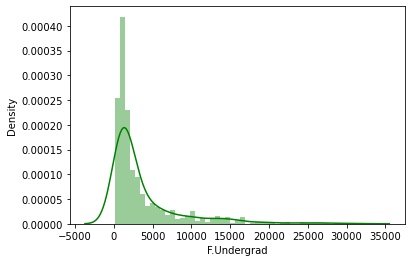

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


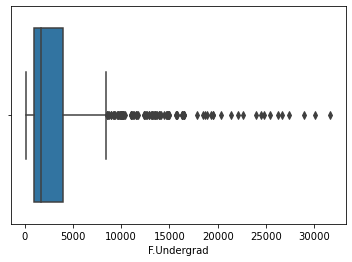

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


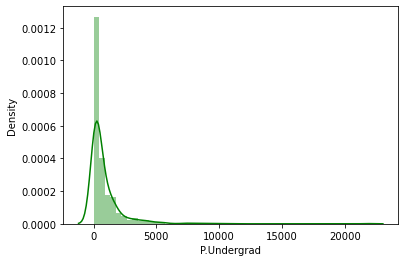

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


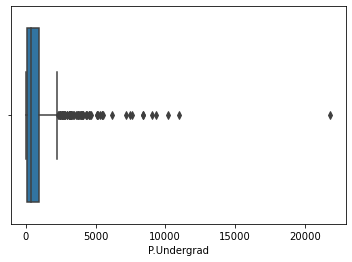

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


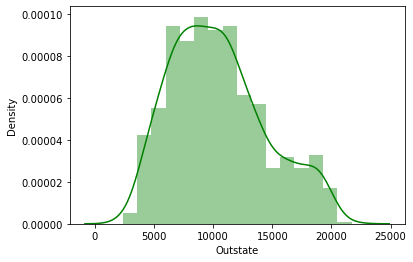

BoxPlot of Outstate
----------------------------------------------------------------------------


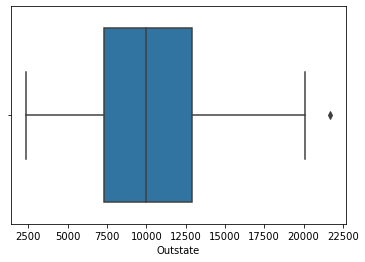

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


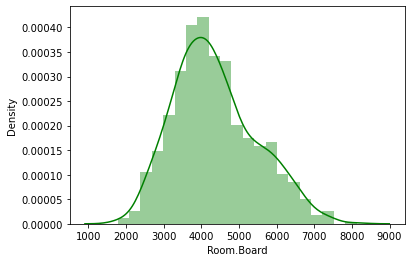

BoxPlot of Room.Board
----------------------------------------------------------------------------


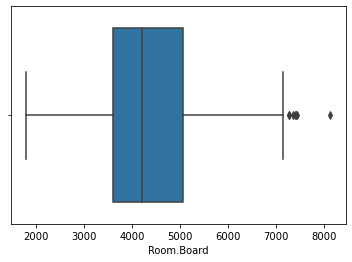

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


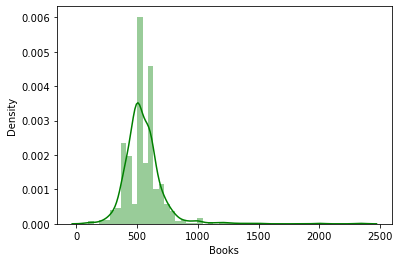

BoxPlot of Books
----------------------------------------------------------------------------


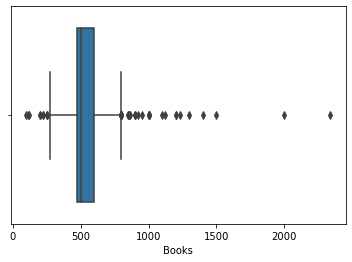

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


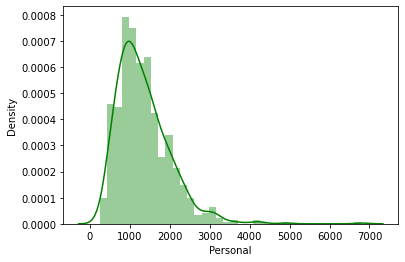

BoxPlot of Personal
----------------------------------------------------------------------------


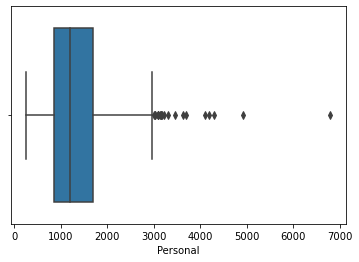

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


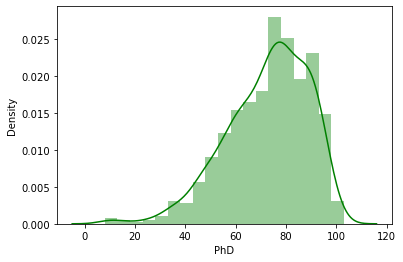

BoxPlot of PhD
----------------------------------------------------------------------------


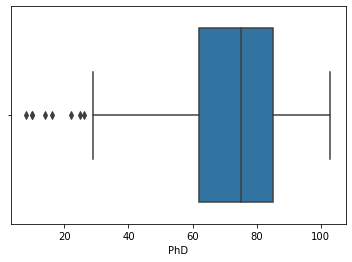

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


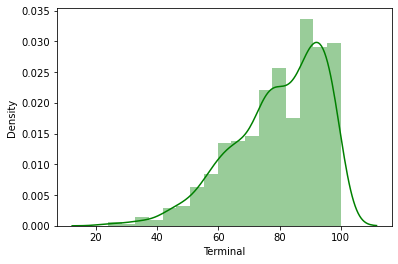

BoxPlot of Terminal
----------------------------------------------------------------------------


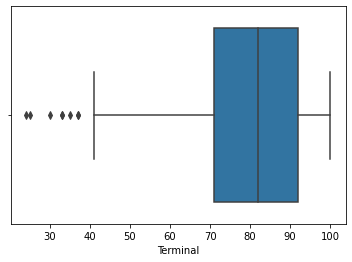

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


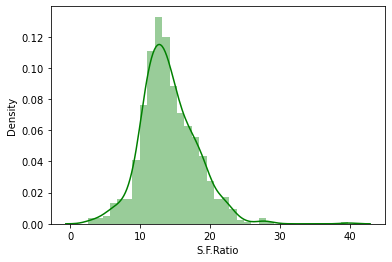

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


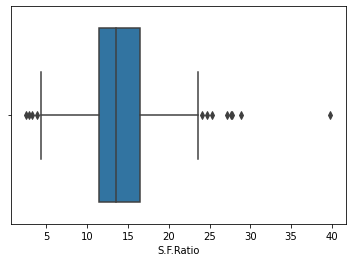

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


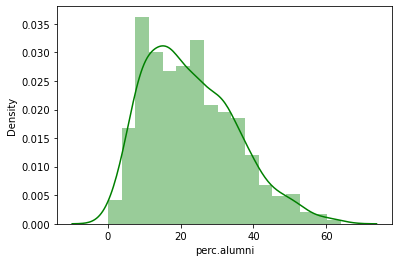

BoxPlot of perc.alumni
----------------------------------------------------------------------------


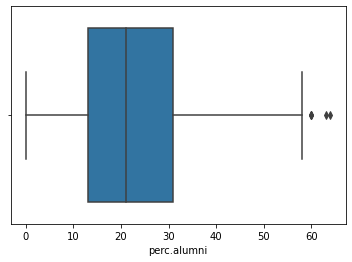

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


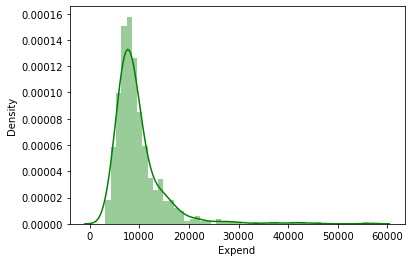

BoxPlot of Expend
----------------------------------------------------------------------------


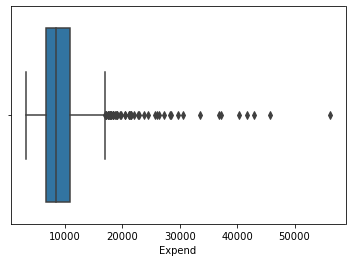

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


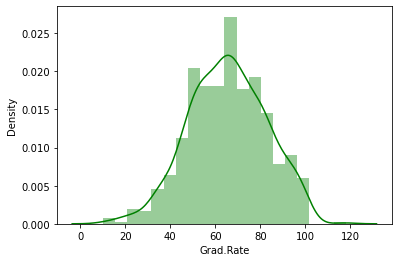

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


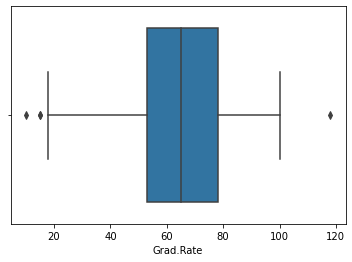

In [66]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

## Observations:
1) There are outliers present in all numeric variables except "Top25perc".

2) PhD and Terminal are highly left skewed.

3) Outliers should be treated.


## Multivariate Analysis

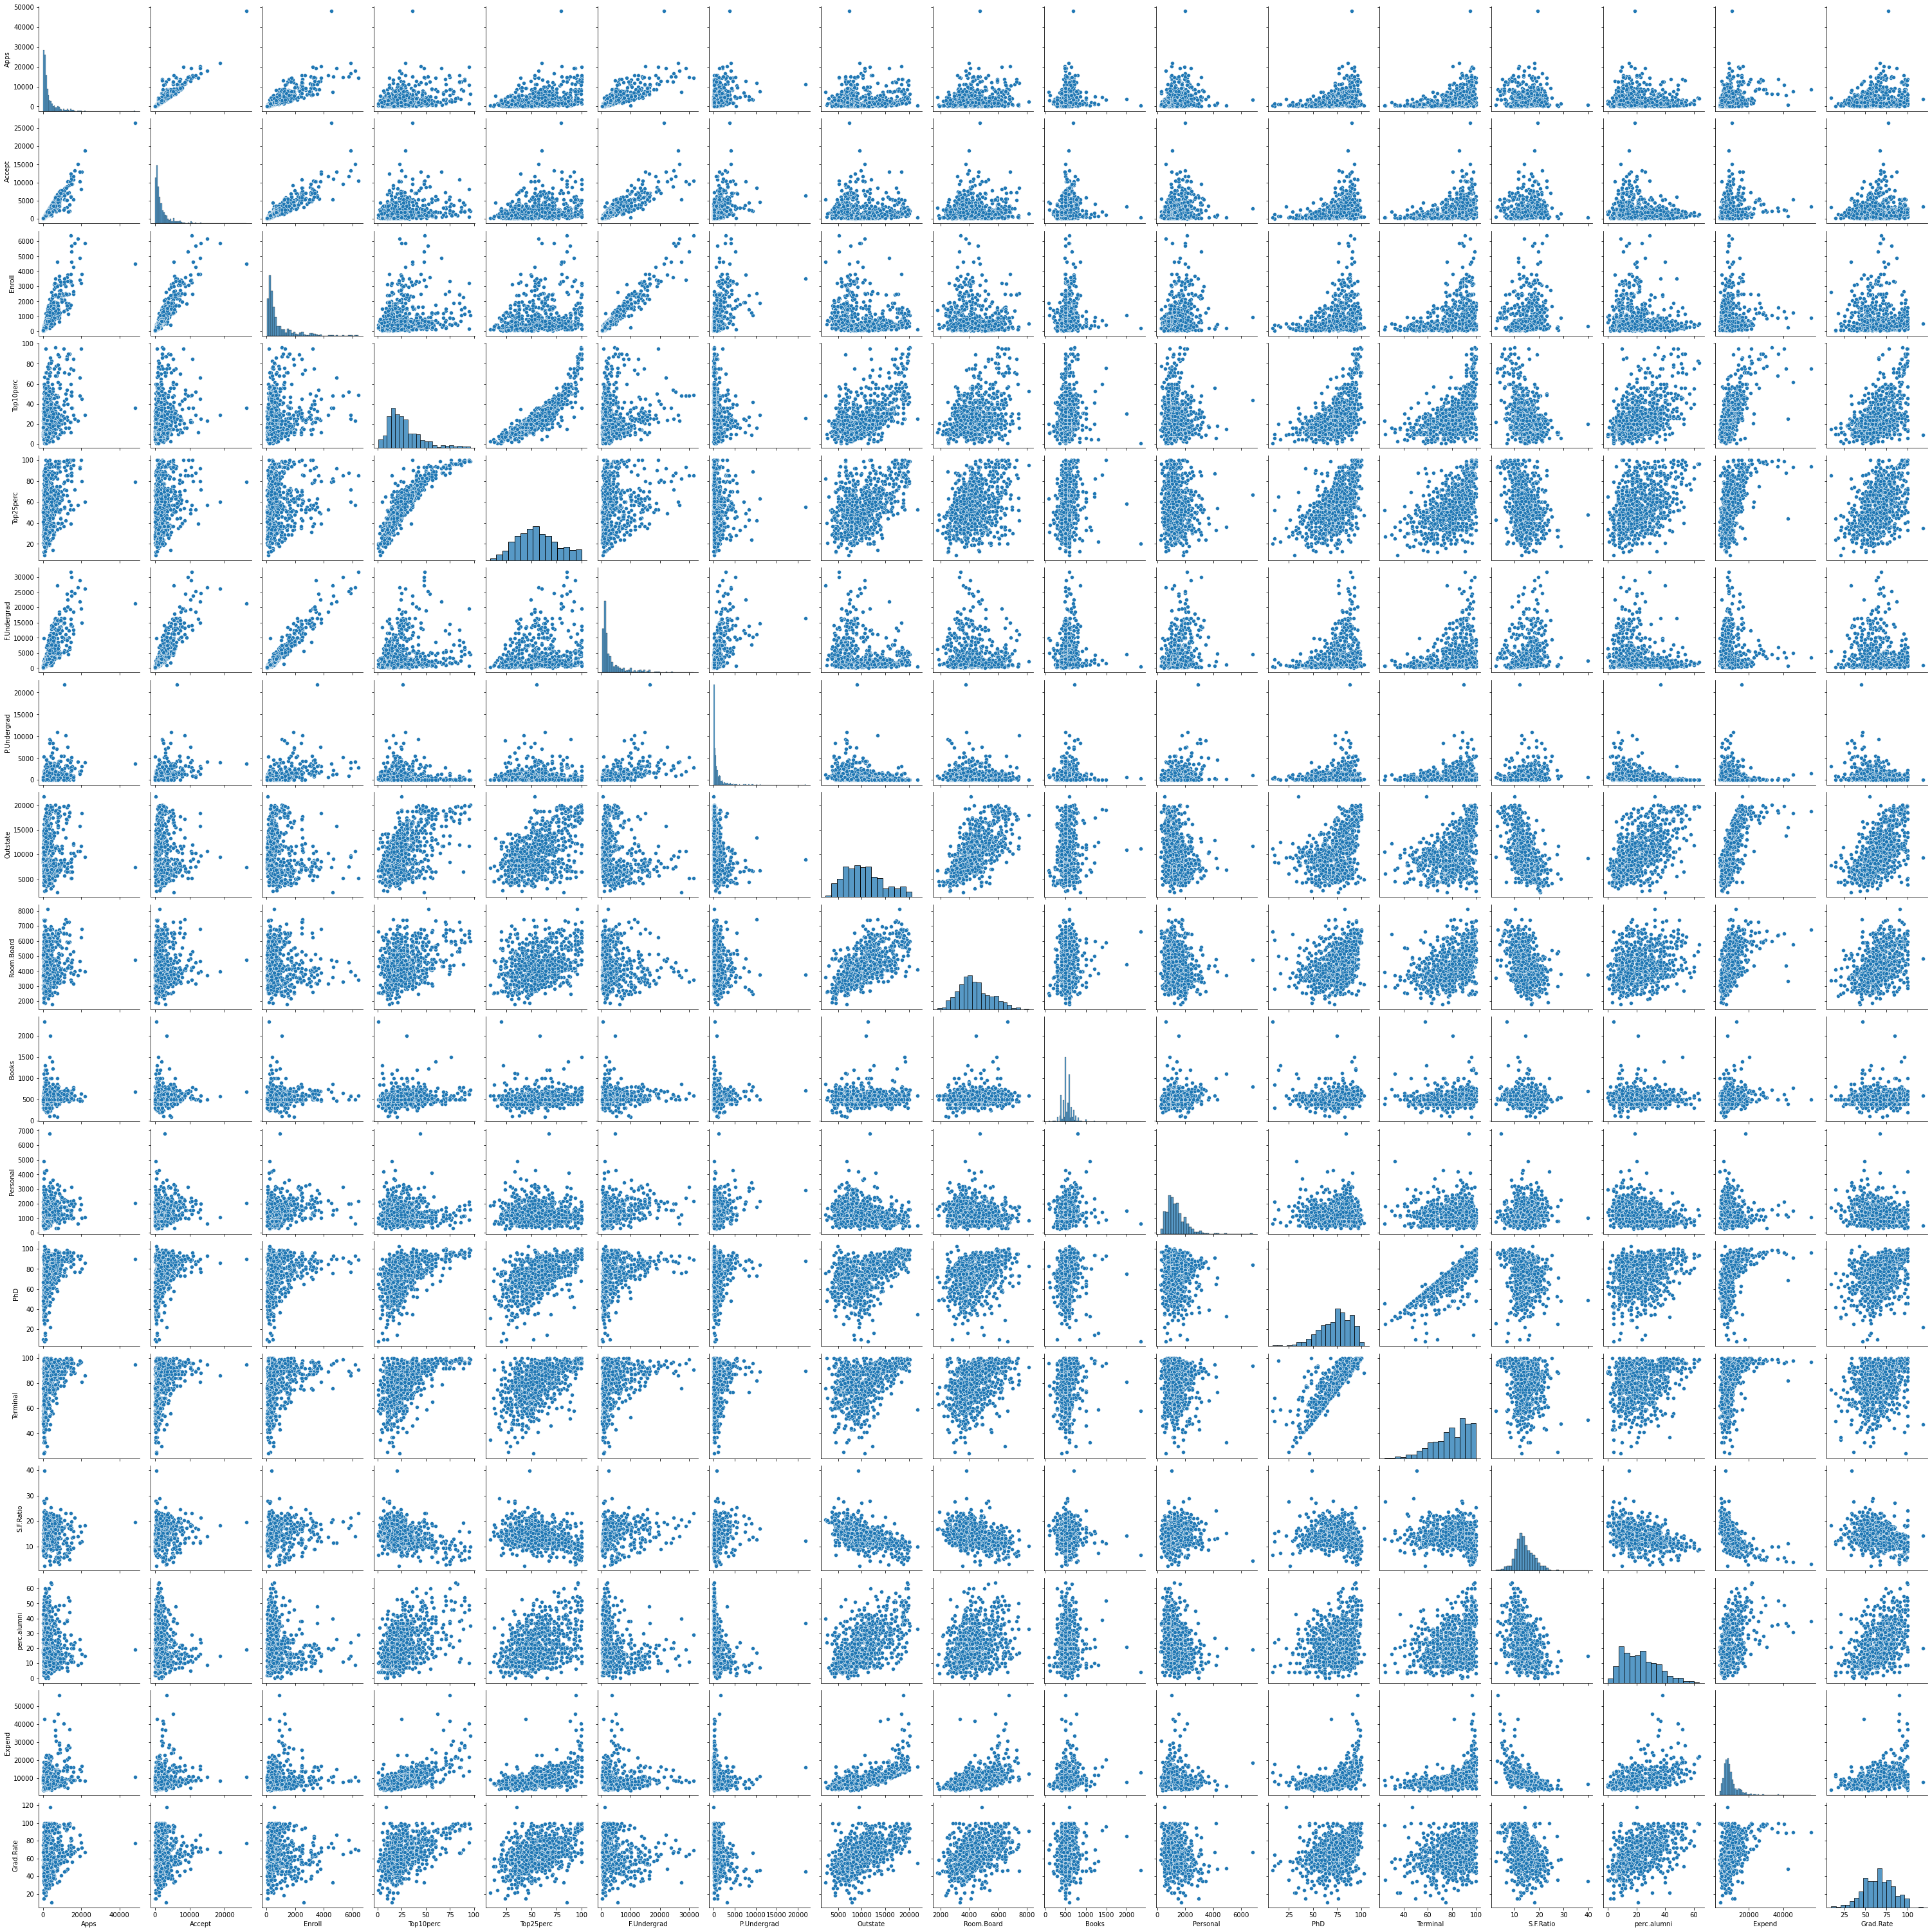

In [67]:
sns.pairplot(df)
plt.show()

In [68]:
corr = df_num.corr(method='pearson')

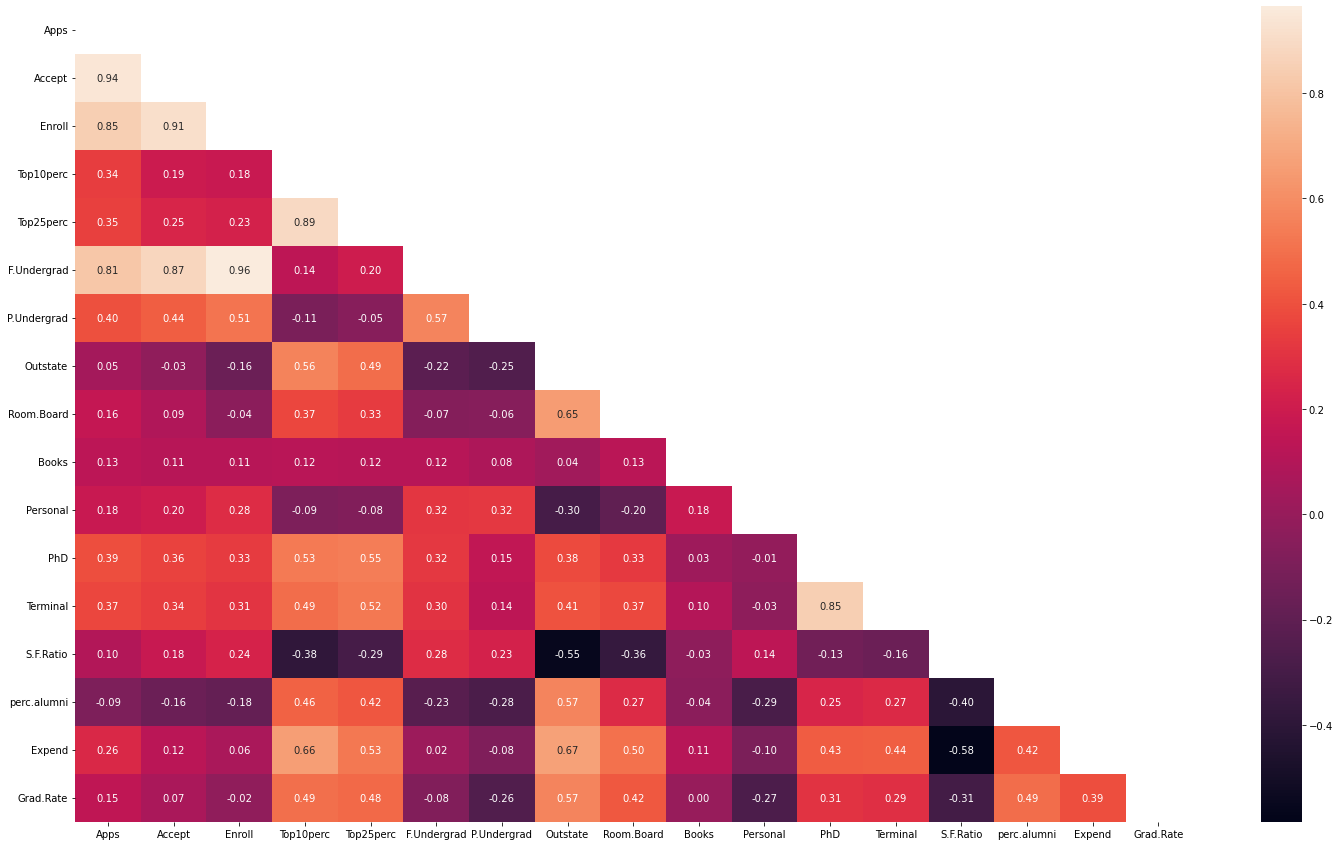

In [69]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### Observation

Observations:

1)	There are considerable number of features that are highly correlated. Correlation ranges from -1 to 1. Values closer to 0 shows no correaltion between varaiables.Closer to 1 is positively correlated

2)	Enroll shows high correlation with 'Apps'&'Accept'.

3)	 F.Undergrad shows high correlation with 'Apps','Accept'& 'Enroll'.

4)	Top25perc shows high correlation with Top10perc.

5)	Terminal shows high correlation with PhD.


2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Apps is having values in thousands and Grad.Rate in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

Scaling normalizes the data using the formula (x-mean)/standard deviation. Standard deviation becomes 1 and mean becomes zero.


In [70]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [71]:
from scipy.stats import zscore
df_num_scaled =  df_num.apply(zscore)

In [72]:
df_num_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

2.3 Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [73]:
np.round(df_num_scaled.cov(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.82   
Accept       0.94    1.00    0.91       0.19       0.25         0.88   
Enroll       0.85    0.91    1.00       0.18       0.23         0.97   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.82    0.88    0.97       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.17    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.53         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.39      -0.30         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.50       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.17   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.66   0.04     -0.30  0.38   
Room.Board         -0.06      0.66        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.38   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.56       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.43   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.39         0.46    0.66       0.50  
Top25perc        0.53      -0.30         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.56         0.57    0.67       0.57  
Room.Board       0.38      -0.36         0.27    0.50       0.43  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

In [74]:
np.round(df_num_scaled.corr(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.42   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.49  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.42  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

Covariance matrix signifies the direction of the linear relationship between the two variables. By direction we mean if the variables are directly proportional or inversely proportional to each other. The values of covariance can be any number between the two opposite infinities.

Correlation matrix not only shows the kind of relation (in terms of direction) but also how strong the relationship is. Thus, we can say the correlation values have standardized notions, whereas the covariance values are not standardized and cannot be used to compare how strong or weak the relationship is because the magnitude has no direct significance. It can assume values from -1 to +1. 
On scaled data, Covariance matrix is same as the correlation matrix of variables.


2.4 Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

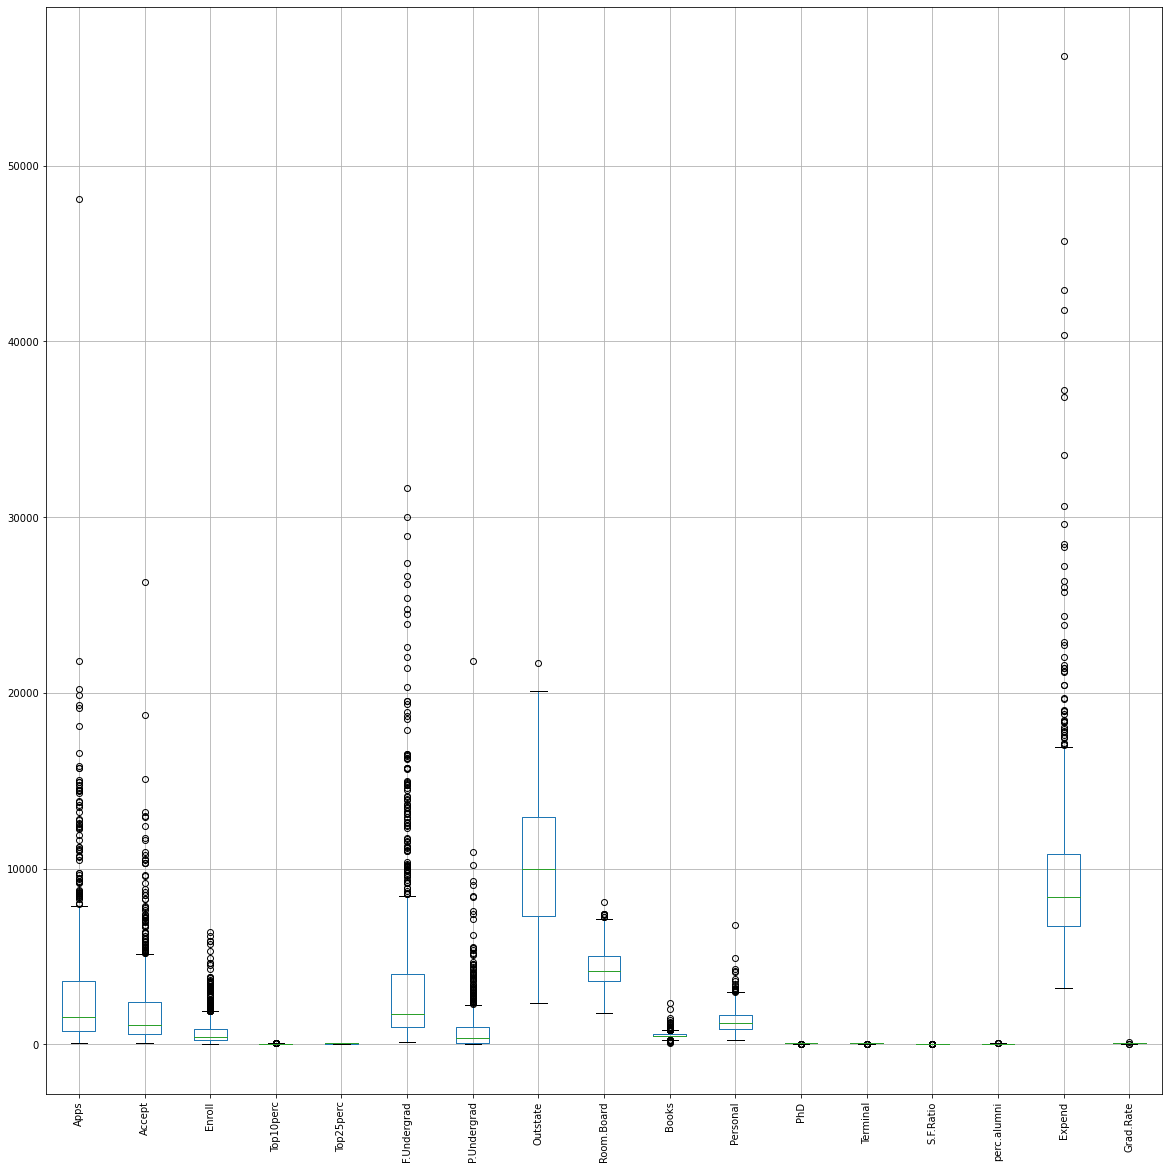

In [75]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

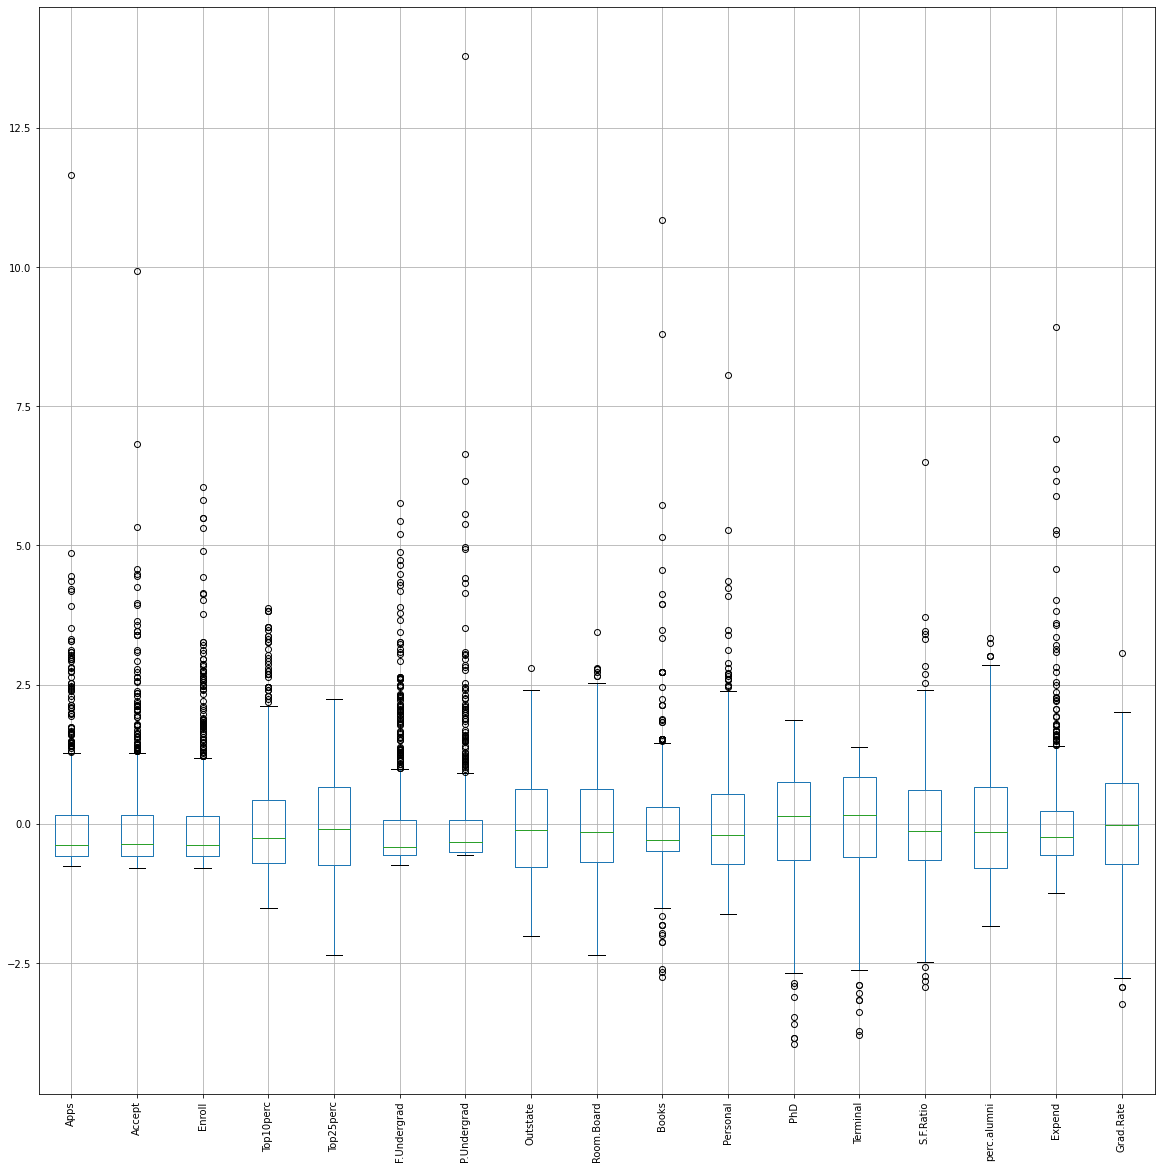

In [76]:
df_num_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

Scaling ensures that attribute means are all 0 and variances 1.
Median are also close to each other.

2.5 Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [77]:
eigvals, eigvecs = np.linalg.eig(df_num_scaled.cov())
print(eigvals)


[5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


In [78]:
print(eigvecs)

[[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
  -3.41099863e-01 -

2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [79]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [80]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8131251200373522

In [81]:
# Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

from sklearn.decomposition import PCA
# NOTE - we are generating 6 PCA dimensions right now
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)


In [82]:
#Extract eigen vectors
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [83]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117])

In [84]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

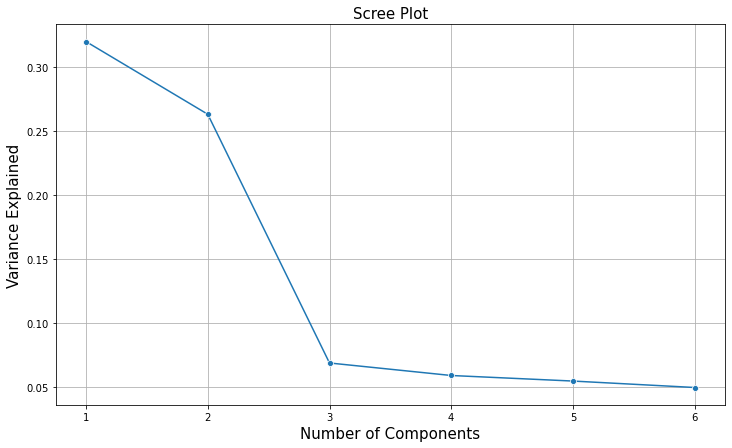

In [85]:
#Create a scree plot
plt.figure(figsize=(12,7))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,7),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [86]:
#General rule of thumb is to choose 𝑘 so as to explain 70% - 90% of the total variance.
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854])

In scree plot, there is a distinct break at 3. However, 𝑘 cannot be taken to be 3 since the first two PCs
explain only 65% of total variance. The PCs must be taken so as to explain between 70% - 90%
of the total variance. If 𝑘 = 6, then the first 6 PCs explain 81.6% of the total variance. One choice
of 𝑘 could have been 4. However, we have taken 𝑘 = 6 so that the explained variance is above
80%.

Let's create a dataframe of component loading against each field and identify the pattern

In [87]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                                    index = df_num_scaled.columns)

In [88]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163

In [89]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                                    index = df_num_scaled.columns)

In [90]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854])

In [91]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(6, 17)

In [92]:
df_pca_loading.head(6)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163

Let's identify which features have maximum loading across the components.

- We will first plot the component loading on a heatmap.

- For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

- Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [93]:
from matplotlib.patches import Rectangle

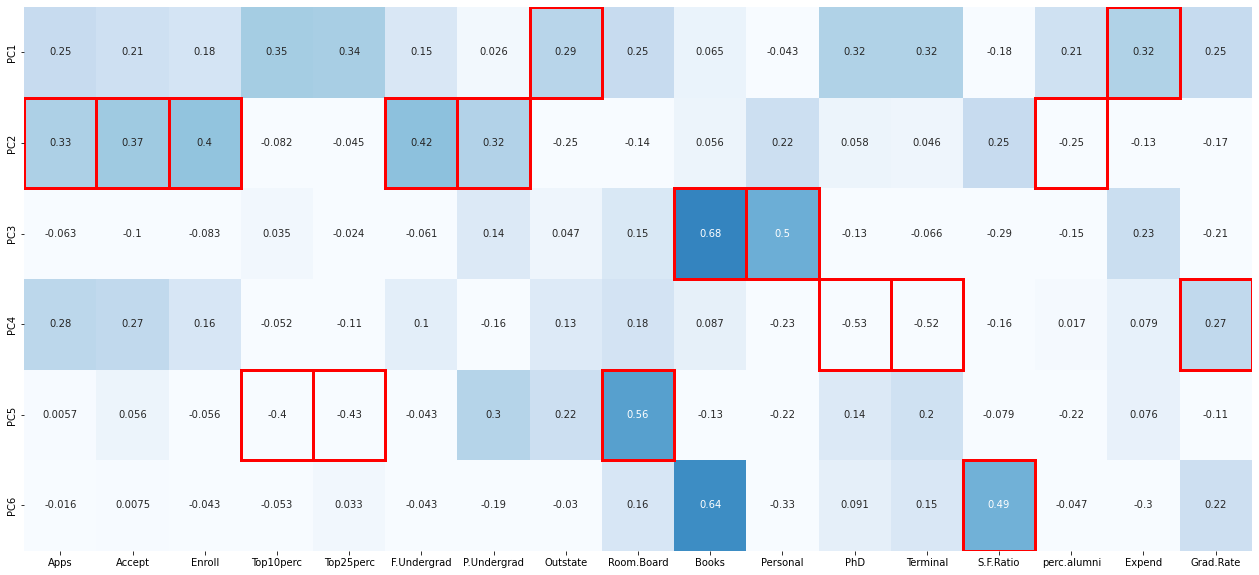

In [94]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]


In [95]:
df_num_scaled.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [96]:
print('The Linear eq of 1st component: ')
for i in range(0,df_num_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_num_scaled.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [97]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854])

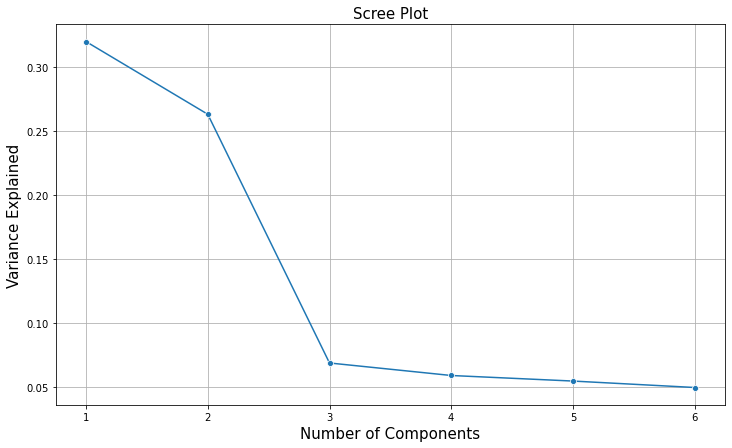

In [98]:
#Create a scree plot
plt.figure(figsize=(12,7))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,7),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

optimum number of principal components can be decided by principal components. Although there are 17 original attributes, more than 80% of the total variance can be explained with only the first 6 PC’s which helps to achieve goal of dimension reduction. In scree plot, there is a distinct break at 2. However, 𝑘 cannot be taken to be 2 since the first two PCs explain only 58% of total variance. The PCs must be taken so as to explain between 70% - 90% of the total variance. If 𝑘 = 6, then the first 6 PCs explain 81.6% of the total variance. One choice of 𝑘 could have been 4. However, we have taken 𝑘 = 6 so that the explained variance is above 81.6%

Eigen vectors indicate directions of the spread of our data.


2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

With the help of PCA, we are able to reduce 17 numeric variables or dimensions to 6 dimension which is able to explain 81.6% of variance in the data. This helps in saving the time and effort to analyze the data.

With help of reduced components, we can observe some patterns. Using the components additional rules can be derived and analyzed.
By ploting the component loading on a heatmap we can identify which features have maximum loading across the components. Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents with the help of subject matter expert. This way we can create new and more relevant features from the original features.
Unsupervised learning like clustering can further be applied on the data to segment the universities based on the components created and further analyzed.
